# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
#Carregando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#recurso interativo do matplotlib

In [2]:
df = pd.read_csv('sinasc_RO_2019.csv')
df

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


# Tratamento dos Dados

In [3]:
var = df.loc[:,['APGAR5', 'SEXO', 'GESTACAO', 'PESO']]
print(var.dtypes)
var.isna().sum()

APGAR5      float64
SEXO         object
GESTACAO     object
PESO          int64
dtype: object


APGAR5       103
SEXO           4
GESTACAO    1232
PESO           0
dtype: int64

In [4]:
# Tratamento dos dados das variáveis:
df.dropna(subset=('APGAR1','APGAR5','SEXO'),inplace=True) # Dados faltantes nas variaveis 'APGAR5','APGAR1' não podem ser encaixados em outra categoria pois segundo o SINASC não podemos presumir, e por isso serão excluídos, e a variável 'PESO' retirado para melhor visualização.
df['GESTACAO'].fillna('Ignorado',inplace=True) # Dados faltantes da variável 'GESTACAO',substituídos por 9, de acordo com o dicionário da SINASC significa ignorado.
var.isna().sum()

APGAR5       103
SEXO           4
GESTACAO    1232
PESO           0
dtype: int64

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:
# Categorizando a variável 'APGAR5'
df.loc[df['APGAR5'] <= 3, 'APGAR5_cat'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5),
           'APGAR5_cat'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7),
           'APGAR5_cat'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8), 'APGAR5_cat'] = 'normal'
df['APGAR5_cat'].value_counts() 


normal              26459
asfixia leve          319
asfixia grave          71
asfixia moderada       68
Name: APGAR5_cat, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

Text(0.5, 1.0, 'Média do APGAR5 por semanas de gestação')

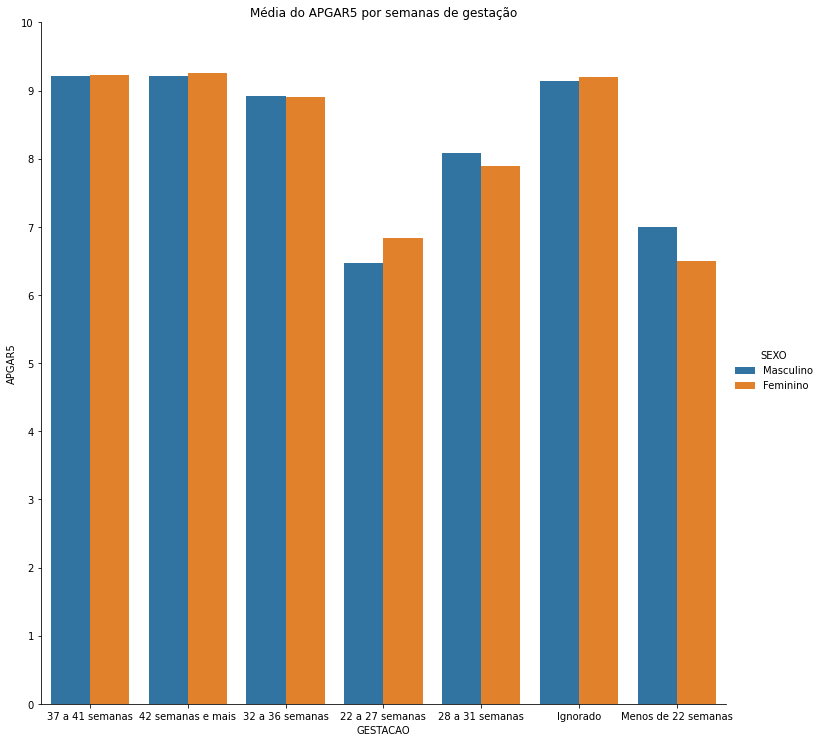

In [6]:

sns.catplot(x='GESTACAO', y='APGAR5'
            , hue = 'SEXO'
            , kind='bar'
            , height = 10
            , data=df
            , ci = None
           )
plt.yticks(range(0,11,1))
plt.title('Média do APGAR5 por semanas de gestação')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
tab = pd.crosstab(df['APGAR5_cat'], df['GESTACAO']) 
tab

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Ignorado,Menos de 22 semanas
APGAR5_cat,,,,,,,
asfixia grave,20,3,7,33,0,6,2
asfixia leve,12,18,73,195,6,14,1
asfixia moderada,1,12,19,28,1,7,0
normal,51,129,2134,22262,690,1189,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
pc_tab = tab.div(tab.sum(axis = 1), axis = 0) # Dividindo a soma das linhas por elas mesmo e gerando a porcentagem
pc_tab

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Ignorado,Menos de 22 semanas
APGAR5_cat,,,,,,,
asfixia grave,0.281690,0.042254,0.098592,0.464789,0.000000,0.084507,0.028169
asfixia leve,0.037618,0.056426,0.228840,0.611285,0.018809,0.043887,0.003135
asfixia moderada,0.014706,0.176471,0.279412,0.411765,0.014706,0.102941,0.000000
normal,0.001928,0.004875,0.080653,0.841377,0.026078,0.044937,0.000151


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='APGAR5_cat'>

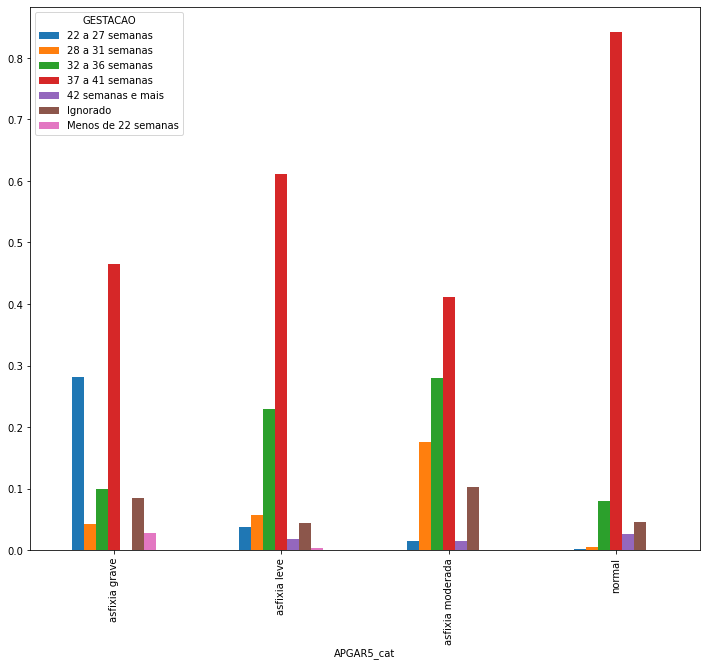

In [9]:
plt.rc('figure', figsize=(12, 10))
pc_tab.plot.bar()


##### Pelo gráfico conclui-se que os prematuros tendem a ter um APGAR5 mais baixo 


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Text(0.5, 1.0, 'APGAR5 relacionado a média do peso do RN')

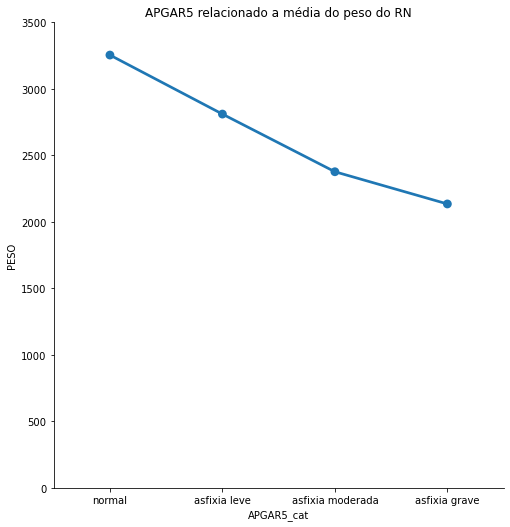

In [12]:

plot_order = df.groupby('APGAR5_cat')['PESO'].sum().sort_values(ascending=False).index.values

sns.catplot(x='APGAR5_cat' #criando um gráfico de comparação entre o APGAR5 relacionado com a média do PESO dos recém nascidos 
            , y='PESO'
            , kind ='point'
            , data = df
            , ci = None
            , height=7
            , order = plot_order
           )
plt.yticks(range(0,4000,500)) # Personalizando a escala do eixo y
plt.title('APGAR5 relacionado a média do peso do RN') #Título do gráfico

##### Podemos concluir que os casos de asfixia mais graves e moderadas estão diretamente relacionados ao peso baixo do recém nascido, pois  quanto mais se agrava a asfixia, diminui o peso.